In [1]:
import pandas as pd
import json
import numpy as np
#from scipy.cluster.vq import kmeans2
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
file = open(r"C:\Users\akash\Documents\AI_Sweden\CarbonZero_Eando\result.json", encoding="utf-8")
result = json.load(file)
result_df = pd.DataFrame(result)

name_index = result_df["name"]
name = result_df.copy()
name = name.drop(columns="embedding")
result_df_copy = result_df.drop(columns=["name"], axis=1)
vector_matrix = np.array(result_df_copy["embedding"].values.tolist())
vector_dataframe = pd.DataFrame(vector_matrix)
vector_dataframe[vector_dataframe.columns] = StandardScaler().fit_transform(vector_dataframe)

Text(0, 0.5, 'Euclidean distance')

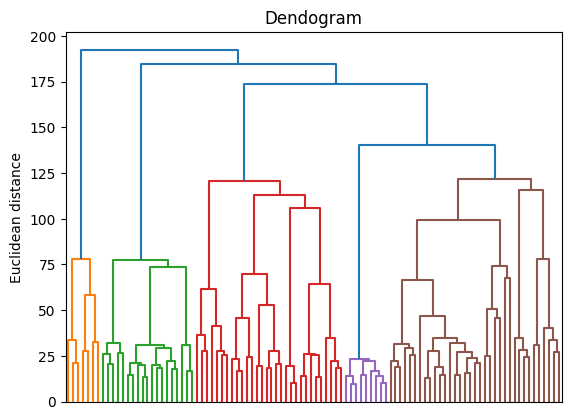

In [4]:
#generationg and plotting the dendogram
dendogram = sch.dendrogram(sch.linkage(vector_dataframe, method='ward', metric='euclidean'), no_labels=True)
plt.title('Dendogram')
plt.ylabel('Euclidean distance')

In [5]:
#calculating the best possible number of clusters by measuring the highest euclidean distance 
def optimal_cluster_number(start):
    cluster = 1
    difference = []
    index = start
    for i in range(200,0,-1):
        hc2 = AgglomerativeClustering(n_clusters=None,distance_threshold=i)
        hc2.fit(vector_dataframe)
        if(cluster < hc2.n_clusters_ ):
            cluster = cluster+1
            difference.append([index -i,i])
            index = i
            # if(difference < index-i):
            #     index = i
    return max(difference)[1]

In [19]:
hc_optimal = AgglomerativeClustering(n_clusters=None, distance_threshold=optimal_cluster_number(200))
hc_optimal.fit(vector_dataframe)
json_file_path = r"C:\Users\akash\Documents\AI_Sweden\CarbonZero_Eando\Clustered_data.json"
for i in range(hc_optimal.n_clusters_):
    # print("Cluster ",i,": ",vector_dataframe[hc.labels_ == i].index)
    print("Cluster ",i,": ")
    vec = np.array((vector_dataframe[hc_optimal.labels_ == i].index))
    
    for j in vec:
        print(name.loc[j, "name"])
        
    print("----------------------------------------------")

Cluster  0 : 
INST. GUIDE RÖR & GÄNGTOLK
T-RÖR ROT FKR  12XR15 UTV
10 KLÄMRING 2-P ADM
10 STÖDHYLSA 5ST ADM
12 KLÄMRING 2-P ADM
12 STÖDHYLSA 5ST BP ADM
12X10 FÖRMINSKNING KLK 2-P ADM
12X8 FÖRMINSKNING KLK 2-P ADM
15 KLÄMRING 2-P ADM
15 STÖDHYLSA 5ST ADM
15 T-RÖR KLK ADM
15X10 FÖRMINSKNING 2ST ADM
15X12 FÖRMINSKNING KLK 2-P ADM
15x15x12 T-RÖR KLK ADM
15X8 FÖRMINSKNING KLK 2-P ADM
18 KLÄMRING 2-P ADM
18X12 FÖRMINSKNING KLK 2-P ADM
18X15 FÖRMINSKNING KLK 2-P ADM
22 KLÄMRING 2-P ADM
22 PLUGG KLK 2-P ADM
22 STÖDHYLSA 3ST  ADM
22 T-RÖR KLK GUL ADM
22 VINKEL KLK ADM
22X12 FÖRMINSKNING KLK 2-P ADM
22X15 FÖRMINSKNING KLK 2-P ADM
22X18 FÖRMINSKNING KLK 2-P ADM
28 KLÄMRING 2-P ADM
28X15 FÖRMINSKNING KLK 2-P ADM
28X22 FÖRMINSKNING KLK 2-P ADM
FÖRMINSKNINGSSATS 10x8 2-P ADM
PEX STÖDHYLSA 12 5ST   ADM
PEX STÖDHYLSA 15 5ST ADM
PLUGG 10 2-P ADM
PLUGG 12 2-P ADM
PLUGG 15 2-P ADM
----------------------------------------------
Cluster  1 : 
KOPPARRÖR RAKA L= 2,5 M 12X1,0
KOPPARRÖR RAKA L= 2,5 M 15X1,0
KO